#Planet Hunters Notebook 1


Since ancient history, humans have looked up into space and wondered: are we alone? There are an estimated 1 billion trillion (1,000,000,000,000,000,000,000) stars in the universe, and it wasn't until 1992 that scientists discovered an exoplanet (a planet orbiting a star other than our own). Thanks to new technology, we now know that not only do exoplanets exist, but they are actually common in the universe! This jupyter notebook will introduce concepts regarding transit photometry, the state-of-the-art method used by astronomers and astrophysicists for detecting exoplanets, as well as visualizing light curves and vetting them for exoplanets. This notebook also utilizes machine learning to automate the searching for exoplanets via a diverse set of models and data augmentation techniques.

##Understanding Transit Photometry


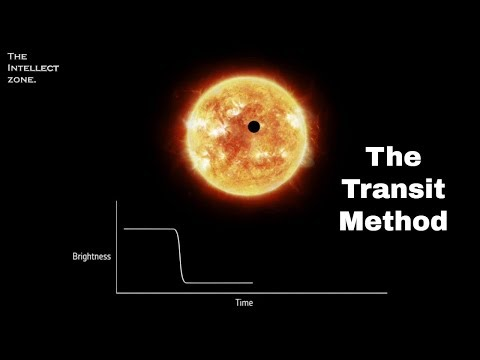

In [ ]:
#@title Watch the video below to learn about exoplanet detection!
from IPython.display import YouTubeVideo
YouTubeVideo('mvK1TslAAaw')

**Transit Photometry Summary**

The idea behind the transit method for exoplanet detection is that planets orbiting other stars are too dark and far away to be imaged directly. Instead, we have to rely on indirect means for detecting their presence. We do this by monitoring the brightness (or flux) of stars over time. If we see dips in the star's brightness at regular intervals, we can infer that these dips may be caused by an orbiting planet. The plot we generate when we measure a star's brightness over time is called a light curve. Here is an example of a light curve below.

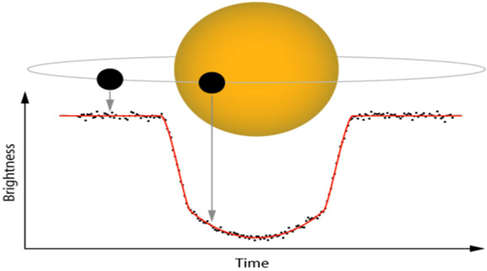

###Discussion of Transit Dips

Without ever knowing it, we've probably understood all of the physics behind transit photometry since we were a little kid!


**Question:**
> What happens when we put our hand in front of a flashlight?




If you've ever found yourself making flashlight shadow puppets, you have demonstrated the foundations of the transit photometry method. By taking a light source (a flashlight /star) and putting a non-luminous object in front of it (your hand / a planet), the non-luminous object blocks the light of the source forming a shadow (a puppet on the wall / a transit dip).

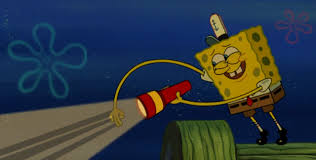

##Understanding and Visualizing the Data

In [ ]:
#@title Run this to Import Data and Packages
import gdown
import pandas as pd
import numpy as np
%pylab inline

#original source:https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTrain.csv'
!wget 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTest.csv'

raw_data = np.loadtxt('exoTrain.csv', skiprows=1, delimiter=',')
x_train = raw_data[:, 1:]
y_train = raw_data[:, 0, np.newaxis] - 1.
raw_data = np.loadtxt('exoTest.csv', skiprows=1, delimiter=',')
x_test = raw_data[:, 1:]
y_test = raw_data[:, 0, np.newaxis] - 1.
del raw_data

flux_data = pd.read_csv('exoTrain.csv',index_col=0)

def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
       # print(sorted_values[:30])
        for j in range(remove):
            idx = sorted_values.index[j]
            #print(idx)
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            #print(idx,idx_num)
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX-'+str(idx2)]

                count += 1
            new_val /= count # count will always be positive here
            #print(new_val)
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                df.set_value(i,idx,new_val)


    return df

def plot_light_curve(dataset, index):
  plt.figure()
  plt.plot(np.array(dataset[index:index+1])[0])
  plt.show()

Populating the interactive namespace from numpy and matplotlib
--2023-07-21 19:31:32--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTrain.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262223348 (250M) [application/octet-stream]
Saving to: ‘exoTrain.csv’

exoTrain.csv        100%[===================>] 250.08M  36.1MB/s    in 7.5s    

2023-07-21 19:31:39 (33.3 MB/s) - ‘exoTrain.csv’ saved [262223348/262223348]

--2023-07-21 19:31:40--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Planet%20Hunters/exoTest.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 10

We've downloaded a NASA dataset from the Kepler Space Telescope! Each row represents measurements of the flux (light intensity) of a particular star. Read more about the dataset [here](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data).

###Understanding the Dataset with Pandas

To understand the dataset, we print out the first 5 rows. Thus, we can get a feel of how the data looks like and what the columns/data attributes are like.

In [ ]:
flux_data = pd.read_csv('exoTrain.csv', index_col=False) #read in the exoplanet data using Pandas
flux_data.LABEL=flux_data.LABEL-1 #change the labels to be 1 for exoplanet and 0 for non-exoplanet
flux_data.head() #Print out the first five rows of the data frame

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In the dataframe, the 3197 flux columns represent the 3197 times that the flux (brightness) of a star was measured at regular intervals, about half an hour apart. These 3197 points can be plotted to show the lightcurve for each star. Unlike the previous images we looked at, we need our light curves to show multiple transits of the planet (with a consistent period) for us to be able to confirm that it is a real transit crossing event.

 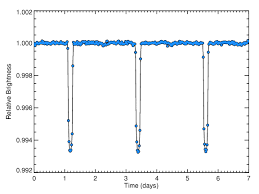

Here, we separate the label column from the rest of the data frame.

In [ ]:
labels = flux_data.LABEL
flux_data = flux_data.drop('LABEL',axis=1) #drop the labels from the data frame, leaving only the flux data

###Separating Exoplanets from Non-Exoplanets

In this dataset, a label of 1 indicates a star that has an exoplanet, and a label of 0 indicates some false positive source that is not an exoplanet.

**We use the `dataframe.loc()` method to separate the exoplanets from the non-exoplanets.**

In [ ]:
non_exo_data=flux_data.loc[labels==0]
exo_data=flux_data.loc[labels==1]

Now we see whether we have more **exoplanets** or **non-exoplanets**



In [ ]:
print ("Number of exoplanets:", len(exo_data))
print ("Number of non-exoplanets:", len(non_exo_data))

Number of exoplanets: 37
Number of non-exoplanets: 5050


###Visualizing Light Curves

To get a sense for what these real light curves look like, we utilize the following function in a loop to **plot 5 light curves from the exoplanet category**.

`plot_light_curve(dataset, index)`



Exoplanet Light Curve 0


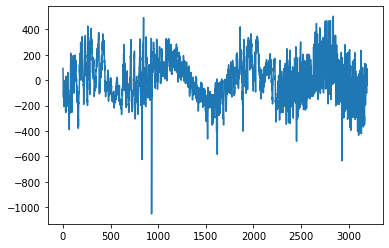

Exoplanet Light Curve 1


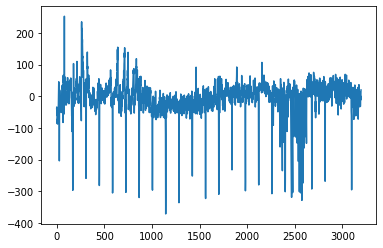

Exoplanet Light Curve 2


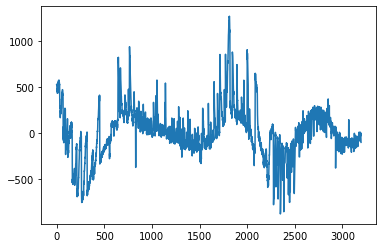

Exoplanet Light Curve 3


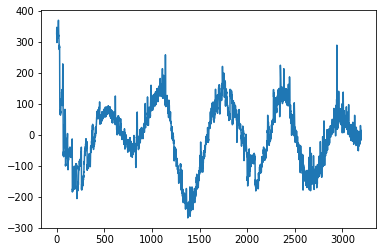

Exoplanet Light Curve 4


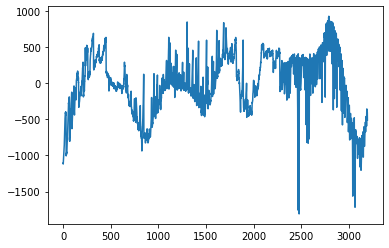

In [ ]:
for i in range(5):
  print('Exoplanet Light Curve '+ str(i))
  plot_light_curve(exo_data, i)

We do the same thing for the non-exoplanet category

Non-Exoplanet Light Curve 0


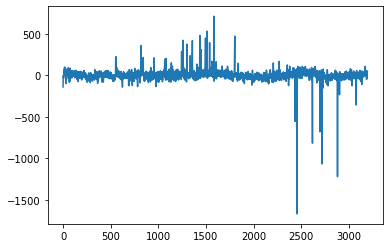

Non-Exoplanet Light Curve 1


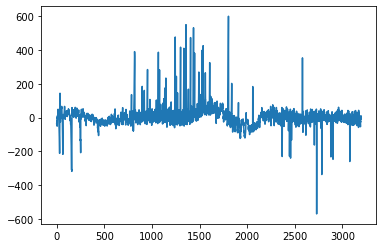

Non-Exoplanet Light Curve 2


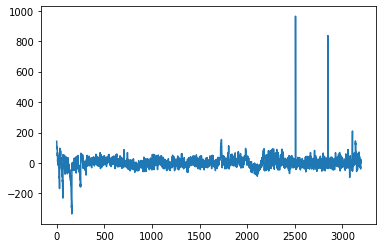

Non-Exoplanet Light Curve 3


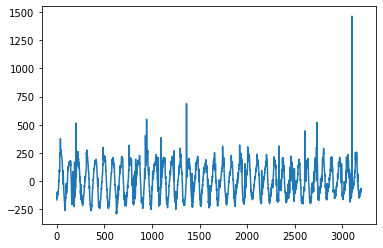

Non-Exoplanet Light Curve 4


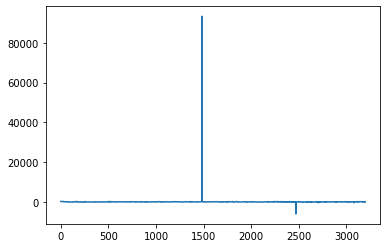

In [ ]:
for i in range(5):
  print('Non-Exoplanet Light Curve '+ str(i))
  plot_light_curve(non_exo_data, i)

We see that the exoplanet light curves are usually more curved and "jumpy" while the non-exoplanet light curves are usually more like a straight line. Thus, these light curves can indicate whether a planetary body is an exoplanet or not.

##Manual Detection of Exoplanets

###Using our observations, let's test whether a random light curve is an exoplanet or not



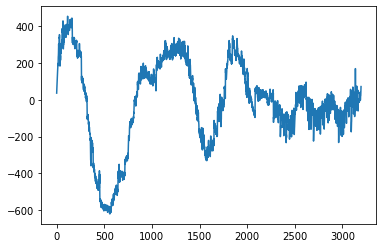

In [ ]:
#@title Printing a random light curve
import random
val=random.randint(0, 1)
if (val==1):
  plot_light_curve(non_exo_data, random.randint(0, len(non_exo_data)))
  title='The true answer is non-exoplanet!'
else:
  plot_light_curve(exo_data, random.randint(0, len(exo_data)))
  title='The true answer is exoplanet!'


Exoplanet or not?

In [ ]:
light_curve_type_guess = "Non-exoplanet" #@param ["Exoplanet", "Non-exoplanet"]
print(title)

The true answer is exoplanet!


###More concepts about interpreting and using results from light curves


**Question:**
> What did we look for when we were determining if a light curve represented an exoplanet?

When scientists search for new planets, one of the most important things they want to measure is the  planet's period (i.e. how long does it take the planet to orbit around its star?).

Now, we're will find out the period of exoplanets by plotting exoplanet light curve #12 (an example light curve to use).

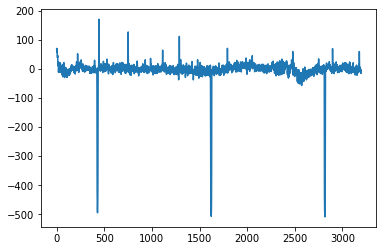

In [ ]:
plot_light_curve(exo_data, 12)

Here, we can see that there is an exoplanet not circling the star with a regular period and the period of the exoplanet is about 600 hours (since each time step is about 30 mins). Based on the graph, the telescope started measuring the star's brightness during the middle of the period.

###Plotting One Period of the Exoplanet Orbit

To recognize exoplanets, we need to get comfortable finding the period from a graph!

Here, we want to try to visualize one period of the exoplanet transit (starting at a dip and ending at a dip). Let's see if we can find the time t_0, the time at which the first transit (dip in plot) starts. Then, we will see if we can find the period length (time from dip to dip), so we can plot one period from start to finish.

*Hint:* Let's set the period to 3917 to first figure out t_0. Then, set the period.

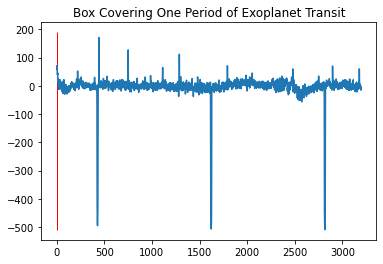

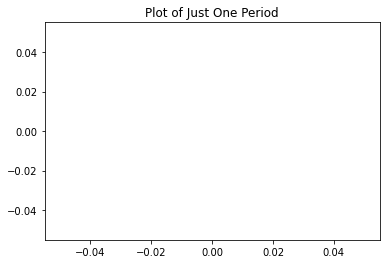

In [ ]:
index = 10 #@param {type:"slider", min:0, max:37, step:1}
t_0 = 687 #@param {type:"slider", min:0, max:3197, step:1}
period = 1081 #@param {type:"slider", min:0, max:3197, step:1}

from matplotlib.patches import Rectangle
light_curve=np.array(exo_data.loc[index])
plt.plot(light_curve)
plt.title('Box Covering One Period of Exoplanet Transit')
plt.gca().add_patch(Rectangle((t_0, -510), period, 700, linewidth=1,edgecolor='r',facecolor='none'))
plt.show()

plt.plot(light_curve[t_0: t_0+period])
plt.title('Plot of Just One Period')
plt.show()

In [ ]:
#@title Example Solution
index = 12
t_0 = 430
period = 1184

###Folding Light Curves

Now, let's try to manually determine if something is an exoplanet! We want to check whether the period the same for all of the dips?

The method used to check this is known as **folding**. Folding means plotting all of the periods on top of each other to see if there is a consistent trend.

*Note:* there is a lot of noise in this data, so each period will not be quite identical. Most importantly, we want to check if the dips occur at roughly the same places.


Below, let's set the time at which period 1 starts as `start_period_1` and the time at which period 2 starts as `stop_period_2`, using the variables `t_0` and `period` from before. Then plot two versions of the curve: starting from the first period and starting from the second period!


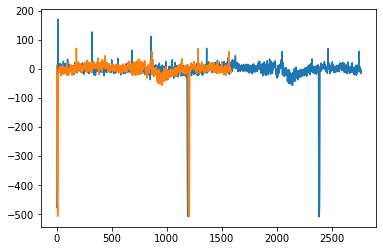

In [ ]:
#Plot the curve starting from Period 1
start_period_1= t_0 #time of first transit
plt.plot(light_curve[start_period_1:]) #plots the first curve in blue

#Plot the curve starting from Period 2
start_period_2= t_0 + period #time of first transit
plt.plot(light_curve[start_period_2:]) #plots the first curve in blue

###So what happens if we use folding to find a period when there isn't one? Let's plot non-exoplanet light curve #25!

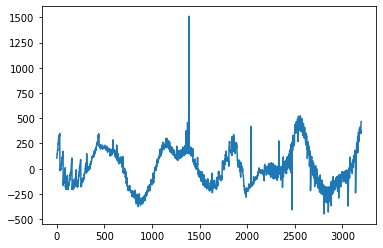

In [ ]:
plot_light_curve(non_exo_data, 25)

It looks like there might be some sort of period here! Let's try to find one using the process from before (set `index` to 25):

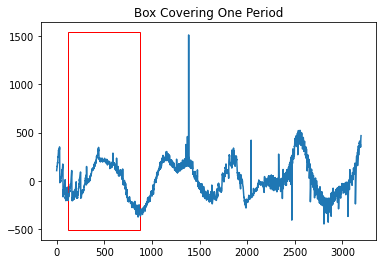

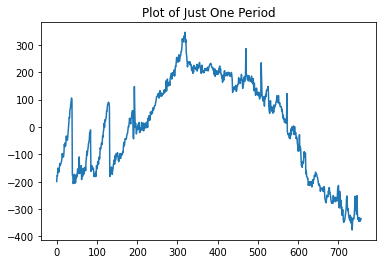

In [ ]:
index = 25 #@param {type:"slider", min:0, max:5050, step:1}
t_0 = 121 #@param {type:"slider", min:0, max:3197, step:1}
period = 757 #@param {type:"slider", min:0, max:3197, step:1}

from matplotlib.patches import Rectangle
light_curve=np.array(non_exo_data.iloc[index])
plt.plot(light_curve)
plt.title('Box Covering One Period')
plt.gca().add_patch(Rectangle((t_0, -510), period, 2050, linewidth=1,edgecolor='r',facecolor='none'))
plt.show()

plt.plot(light_curve[t_0: t_0+period])
plt.title('Plot of Just One Period')
plt.show()

In [ ]:
#@title Example Solution
index = 25
t_0 = 121
period = 757


What happens when we plot a shifted version of the curve on top of itself?

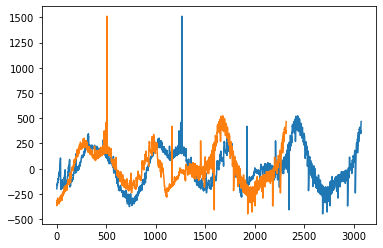

In [ ]:
#Plot the curve starting from Period 1
start_period_1= t_0 #time of first transit
plt.plot(light_curve[start_period_1:]) #plots the first curve in blue

#Plot the curve starting from Period 2
start_period_2= t_0 + period #time of first transit
plt.plot(light_curve[start_period_2:]) #plots the first curve in blue

###Conclusion
Today, we saw how to identify exoplanets using human intelligence! In the next notebooks, we'll try to automate this process using machine learning.